<a href="https://colab.research.google.com/github/aiswaryarkamath/Algerian_forest_fire/blob/main/NN_DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Dataset Loading and Cleaning**

Load the dataset, check for any missing values.

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [74]:
import pandas as pd

# Loading the dataset
file_path = '/content/Algerian_forest_fires_cleaned.csv'
df = pd.read_csv(file_path)

# Preview the first few rows of the dataset
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [77]:
# Check the number of rows and columns
df.shape

(243, 15)

In [78]:
# dataset Statistics
# Generate summary statistics for numerical columns
df.describe()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [79]:
# Check for missing values in the entire dataset
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [80]:
# Forward fill for missing values in features
df.fillna(method='ffill', inplace=True)


<ipython-input-80-9cffc5331445>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [81]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [82]:
# Trim whitespace from the 'Classes' column
df['Classes'] = df['Classes'].str.strip()
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [83]:
# Create a new column 'Class_Binary'
df['Class_Binary'] = df['Classes'].map({'not fire': 0, 'fire': 1})

# Check for any NaN values in the new binary column
print("Missing values in 'Class_Binary':", df['Class_Binary'].isnull().sum())

df

Missing values in 'Class_Binary': 0


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Class_Binary
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0


In [84]:
# Drop the original 'Classes' column
df.drop(columns=['Classes'], inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Class_Binary
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0


In [85]:
df.shape

(243, 15)

In [86]:
# Verify no missing values remain
print("Missing values after handling:")
print(df.isnull().sum())

# Preview cleaned data
print(df.head())


Missing values after handling:
day             0
month           0
year            0
Temperature     0
RH              0
Ws              0
Rain            0
FFMC            0
DMC             0
DC              0
ISI             0
BUI             0
FWI             0
Region          0
Class_Binary    0
dtype: int64
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Region  Class_Binary  
0  0.5       0             0  
1  0.4       0             0  
2  0.1       0             0  
3  0.0       0             0  
4  0.5       0             0  


**Feature** **Engineering**


In [87]:

# Combine 'day', 'month', and 'year' into a single 'Date' feature
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Drop original 'day', 'month', and 'year' columns if no longer needed
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

# Check the new dataframe
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Class_Binary,Date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


In [88]:
df.shape

(243, 13)

In [89]:
#Select relevant features for the model
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
X = df[features]

# Target variable
y = df['Class_Binary']

# Preview selected features and target variable
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Features (X):
   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5

Target Variable (y):
0    0
1    0
2    0
3    0
4    0
Name: Class_Binary, dtype: int64


**Data Visualization**

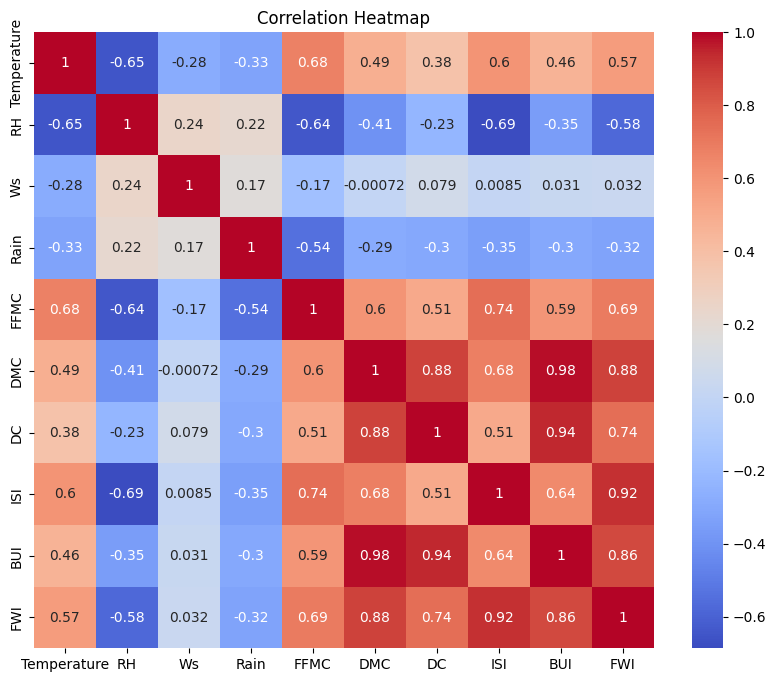

In [90]:
# correlation
plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Training
**

In [91]:
# Splitting Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(194, 10) (49, 10) (194,) (49,)


In [92]:
# Check if y_train contains any NaN values
print(y_train.isnull().sum())


0


In [93]:
# Fill missing values in y_train (if you have a meaningful fill strategy)
y_train.fillna(0, inplace=True)  # Example: Filling with 0 (adjust based on your use case)


**Using Various Models**

In [94]:
# MULTIPLE LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a multiple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred = linear_model.predict(X_test)

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression MSE:', mse)


Linear Regression MSE: 0.08347238906971761


In [95]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

# Transform features into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split transformed data into train and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Polynomial Regression MSE:', mse_poly)


Polynomial Regression MSE: 0.2561336443085582


In [96]:
# Lasso And Ridge Regression

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print('Lasso Regression MSE:', mean_squared_error(y_test, y_pred_lasso))

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('Ridge Regression MSE:', mean_squared_error(y_test, y_pred_ridge))


Lasso Regression MSE: 0.09512961337829835
Ridge Regression MSE: 0.08347435460496586


In [97]:
# Cross Validation and Hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model score
print('Best Params:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Best Params: {'alpha': 10}
Best Score: -0.07736852983092704


In [98]:
# Model Evaluation and Testing
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluate Linear Regression Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression R²: {r2}, MAE: {mae}')


Linear Regression R²: 0.6625972960330102, MAE: 0.24796311427950965


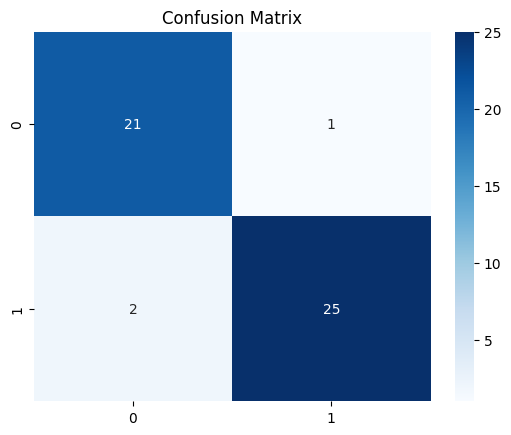

In [99]:
# Confusion Matrix for Classification

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Binarize predictions for classification
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [100]:
# All Matrices

# prompt: Evaluate all the metrics for all the models

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(y_true, y_pred):
  """Evaluates a model using various metrics."""
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)

  return r2, mae, mse, rmse

# Evaluate Linear Regression
r2_lr, mae_lr, mse_lr, rmse_lr = evaluate_model(y_test, y_pred)
print("Linear Regression Metrics:")
print(f"R-squared: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

# Evaluate Polynomial Regression
r2_poly, mae_poly, mse_poly, rmse_poly = evaluate_model(y_test, y_pred_poly)
print("\nPolynomial Regression Metrics:")
print(f"R-squared: {r2_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")

# Evaluate Lasso Regression
r2_lasso, mae_lasso, mse_lasso, rmse_lasso = evaluate_model(y_test, y_pred_lasso)
print("\nLasso Regression Metrics:")
print(f"R-squared: {r2_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")

# Evaluate Ridge Regression
r2_ridge, mae_ridge, mse_ridge, rmse_ridge = evaluate_model(y_test, y_pred_ridge)
print("\nRidge Regression Metrics:")
print(f"R-squared: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")


Linear Regression Metrics:
R-squared: 0.6626
MAE: 0.2480
MSE: 0.0835
RMSE: 0.2889

Polynomial Regression Metrics:
R-squared: -0.0353
MAE: 0.2603
MSE: 0.2561
RMSE: 0.5061

Lasso Regression Metrics:
R-squared: 0.6155
MAE: 0.2692
MSE: 0.0951
RMSE: 0.3084

Ridge Regression Metrics:
R-squared: 0.6626
MAE: 0.2480
MSE: 0.0835
RMSE: 0.2889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

**Hyperparameter tuning**

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset (as previously discussed)
df = pd.read_csv(file_path)
df.fillna(method='ffill', inplace=True)
df['Classes'] = df['Classes'].str.strip()
df['Class_Binary'] = df['Classes'].map({'not fire': 0, 'fire': 1})
df.drop(columns=['Classes'], inplace=True)

# Feature selection
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
X = df[features]
y = df['Class_Binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 2: Define the models and hyperparameters for tuning
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Hyperparameters for Ridge and Lasso
param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.1, 1, 10, 100]}
}

# Step 3: Hyperparameter tuning function
def tune_model(model_name, model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Step 4: Perform hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        best_model, best_params = tune_model(name, model, param_grid[name], X_train_scaled, y_train)
        best_models[name] = (best_model, best_params)
        print(f"{name} - Best Params: {best_params}")

# Step 5: Evaluate best models
for name, (model, _) in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"{name} - Accuracy: {accuracy:.4f}")


<ipython-input-101-7d97cc719581>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Ridge Regression - Best Params: {'alpha': 0.1}
Lasso Regression - Best Params: {'alpha': 0.1}
Ridge Regression - Accuracy: 0.9184
Lasso Regression - Accuracy: 0.9184


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


In [102]:
#Saving model as pickle
import pickle

# Save the best model to a pickle file
best_model_name = max(best_models, key=lambda k: accuracy_score(y_test, (best_models[k][0].predict(X_test_scaled) > 0.5).astype(int)))
best_model = best_models[best_model_name][0]

# Save the model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"{best_model_name} saved to 'best_model.pkl'")


Ridge Regression saved to 'best_model.pkl'


In [103]:
# Loading model from pickle file

# Step 3: Load the model from the pickle file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print(f"Loaded model: {loaded_model}")


Loaded model: Ridge(alpha=0.1)


In [104]:
# Test the loaded model on unseen data
unseen_data = pd.DataFrame({
    'Temperature': [30],
    'RH': [50],
    'Ws': [10],
    'Rain': [0.0],
    'FFMC': [80.0],
    'DMC': [10.0],
    'DC': [100.0],
    'ISI': [10.0],
    'BUI': [30.0],
    'FWI': [20.0]
})

# Scale the unseen data
unseen_data_scaled = scaler.transform(unseen_data)

# Make predictions
predictions = loaded_model.predict(unseen_data_scaled)
predicted_class = (predictions > 0.5).astype(int)

print('predicted class: ', predicted_class)

# Print the prediction
if predicted_class[0] == 0:
    print("Predicted class for unseen data: not fire")
else:
    print("Predicted class for unseen data: fire")


predicted class:  [1]
Predicted class for unseen data: fire
